In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import random
import pandas as pd
import pymc3 as pm

exercise 1

Here we will generate different data from the distributions specified in the condition. We will have approximately maximum 20 customers per hour, with varying numbers, because this isn't very constant. A dog's weight ranging from 6 to 13 kg, elephant's weight from 3465 to 6464 and a human weight from 60 to 100kg.

In [32]:
def generate_customers(mu=7, size=500):
    return stats.poisson.rvs(mu=mu, size=size)

def generate_dogs_weight(loc=6, scale=7, size=500):
    return stats.uniform.rvs(loc=loc, scale=scale, size=size)

def generate_elephants_weight(loc=3465, scale=3000, size=500):
    return stats.norm.rvs(loc=loc, scale=scale, size=size)

def generate_humans_weight(loc=50, scale=40, size=500):
    return stats.skewnorm.rvs(a=15, loc=loc, scale=scale, size=size)

In [22]:
def plot_stats(stats_data, title):
    plt.plot(stats_data)
    plt.title(title)
    plt.show()

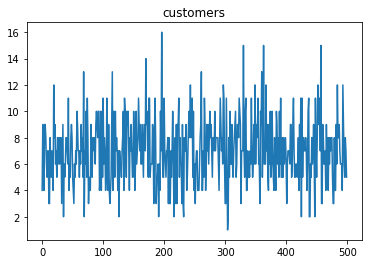

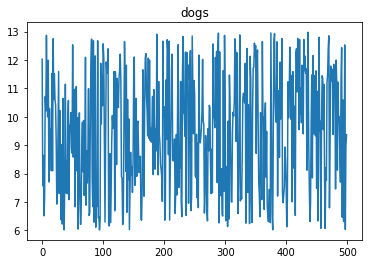

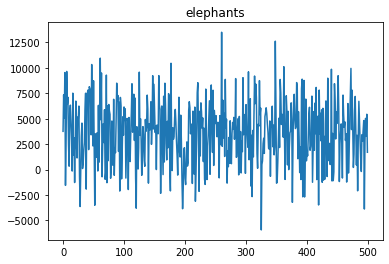

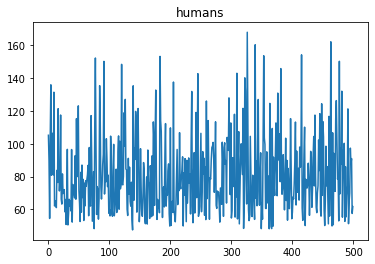

In [33]:
plot_stats(list(generate_customers()), "customers")
plot_stats(list(generate_dogs_weight()),"dogs")
plot_stats(list(generate_elephants_weight()), "elephants")
plot_stats(list(generate_humans_weight()), "humans")

As we can see, we have varying number of customers, which is close to reality, and considering it is a small coffee shop, the numbers seem realistic. The dogs weight range as we could've expected, from 6 to 13. The elephant's weight can also be negative because it's a normal distribution, and the numbers are as we expected. Humans' weight is also as we could expect, a bit less than 60 and sometimes 140 and so, but it is pretty centered below 100, which is close to reality.

exercise 2

Here, we will create a model that will have y as an observed value, and theta will be known. Y will be binomially distributed. We will try every possible combination of observed y and thetas and plot the data obtained.

In [63]:
def visualize_data(ys_obs, thetas):
    for y_obs in ys_obs:
        for theta in thetas:
            with pm.Model() as model:
                n = pm.Poisson('n', mu=10)
                y = pm.Binomial('y', n=n, p=theta, observed=y_obs)
                idata = pm.sample(2000, return_inferencedata=True)
            az.plot_posterior(idata)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


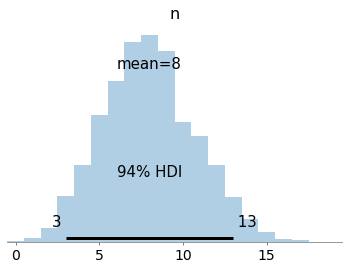

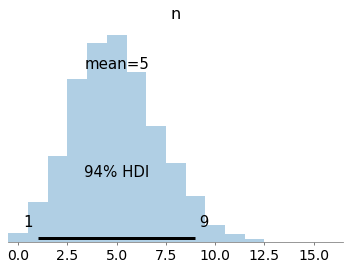

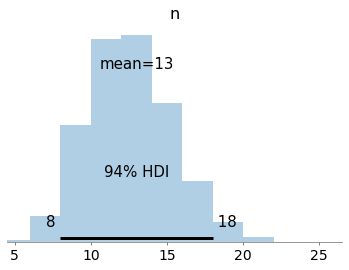

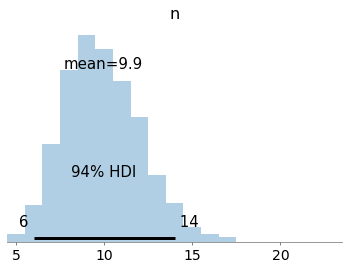

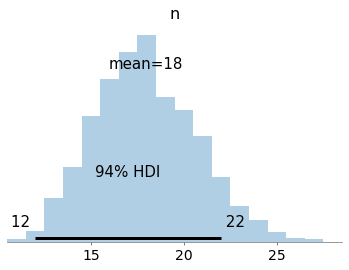

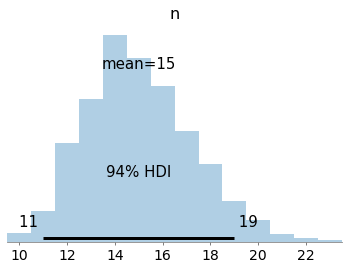

In [64]:
visualize_data(ys_obs=[0, 5, 10], thetas=[0.2, 0.5])

As we can see, as y is smaller, the mean is smaller, that is we were visited by less clients. Also, as the theta is bigger, the means is smaller. Also, we cand see that HDI is of length 10 for theta=0.2 (that is the smallest and biggest value have a difference being 10). Thus, we can see that theta (the probability of getting a customer) and y (the numberof observed clients) can greatly influence the posterior distribution, making it have smaller or bigger values, having a smaller or bigger HDI and having a smaller or bigger mean.

exercise C

In [72]:
with pm.Model() as model:
   data = np.random.binomial(n=1, p=0.5,size=150)
   a = pm.Deterministic('a', data)
   idata = pm.sample(2000, return_inferencedata=True)

AttributeError: 'numpy.ndarray' object has no attribute 'name'